#### Carregando a base de dados

In [13]:
import pickle

with open(r'../_Material/Bases de dados/Bases pre-processadas/base_credit_data.pkl', mode = 'rb') as arquivo:
    x_previsores_treinamento, y_classes_treinamento, x_previsores_teste, y_classes_teste = pickle.load( arquivo )

In [14]:
x_previsores_treinamento.shape, y_classes_treinamento.shape

((1500, 3), (1500,))

In [15]:
x_previsores_teste.shape, y_classes_teste.shape

((500, 3), (500,))

#### Aplicação do aprendizado

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import figure

In [17]:
# Instanciando objeto do modelo e definindo que o resultado do aprendizado deve ser o mesmo a cada execução
arvore_de_decisao = DecisionTreeClassifier( criterion = 'entropy', random_state = 0 )

In [18]:
arvore_de_decisao.fit( x_previsores_treinamento, y_classes_treinamento )

DecisionTreeClassifier(criterion='entropy', random_state=0)

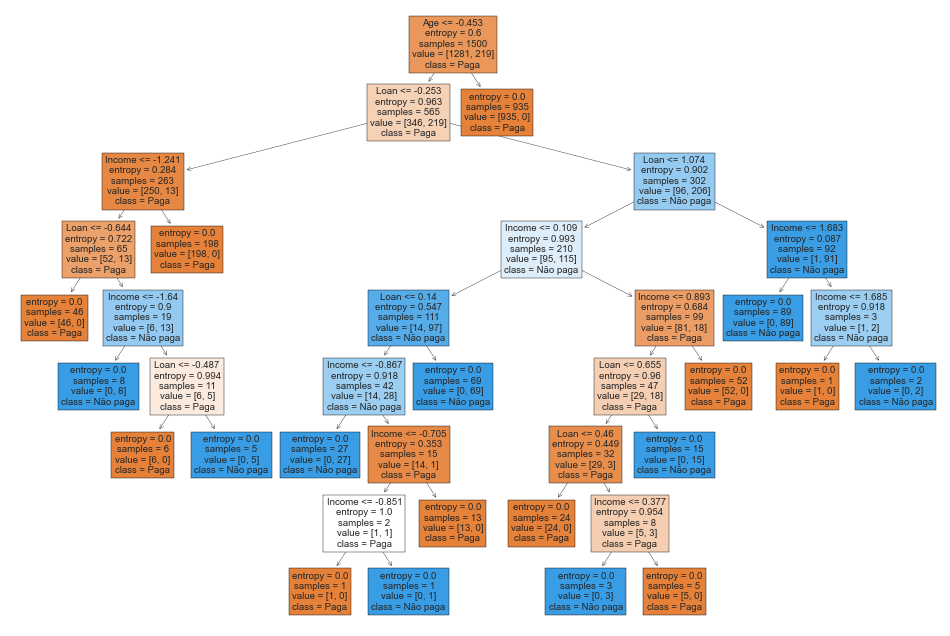

In [19]:
figure(figsize=(12, 8))

plot_tree(
    arvore_de_decisao,
    feature_names = ['Income', 'Age', 'Loan'],
    class_names = ['Paga', 'Não paga'],
    filled = True
);

In [20]:
previsao = arvore_de_decisao.predict( x_previsores_teste )

In [21]:
print( 'Precisão do modelo: ', accuracy_score( y_classes_teste, previsao ) * 100, '%' )

Precisão do modelo:  98.2 %


#### Visualizando resultados do modelo

In [22]:
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from matplotlib.pyplot import xlabel, ylabel

#### Explicação do resultado

Nesta matriz, os valores são provenientes do cruzamento entre as previsões e os valores reais do conjunto de dados. Sendo assim, pode-se chegar à seguinte conclusão:


**Para a classe "0", 430 previsões estão corretas e 6 estão incorretas.**

<br>

**Para a classe "1", 61 previsões estão corretas e 3 estão incorretas.**

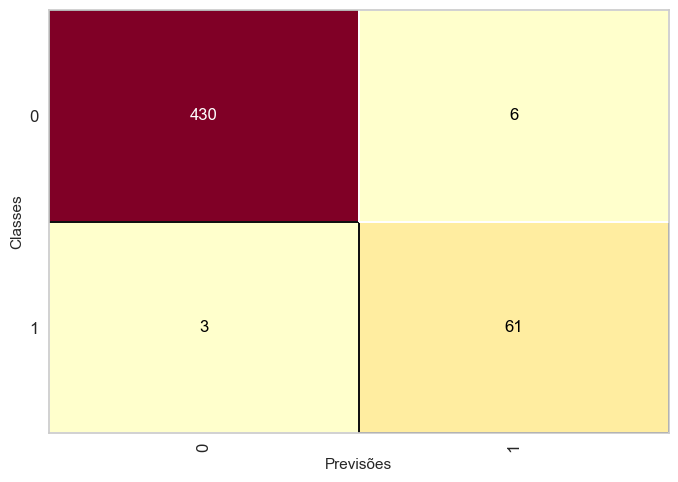

In [23]:
cm = ConfusionMatrix( arvore_de_decisao )
cm.fit( x_previsores_treinamento, y_classes_treinamento )
cm.score( x_previsores_teste, y_classes_teste )

xlabel('Previsões');
ylabel('Classes');

##### Gerando relatório de classificação

In [24]:
print(classification_report(
    y_classes_teste,  # y teste
    previsao
))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500

